The goal of this workflow is to be able to generate a training dataset based on a specific training data input set and apply that to 



## Things I might want to itorate over

### Testing 
# SNIC model parameters
# input training data class 
# RF model parameters 
## outputs
# maybe a visual features 
# error matrix against test train spilt 
# ideally we can generate a set of models and produce a dataframe of output accessments. 


### applying 
# collection years 
# classification areas 



Error in callback <function _set_css_in_cell_output at 0x00000204652A21F0> (for pre_run_cell), with arguments args (<ExecutionInfo object at 20470b55a60, raw_cell="import ee
import geemap
import geopandas as gpd
im.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/c%3A/Users/carverd/Documents/GitHub/Agroforestry/primaryWorkflow.ipynb#W3sZmlsZQ%3D%3D>,),kwargs {}:


TypeError: _set_css_in_cell_output() takes 0 positional arguments but 1 was given

<Axes: >

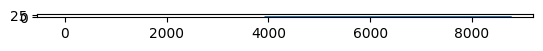

In [36]:
import ee
import geemap
import geopandas as gpd
import pandas as pd
from agroforestry.config import * 
from agroforestry.geeHelpers import *
from agroforestry.naipProcessing import *
from agroforestry.snicProcessing import *
from agroforestry.randomForest import *
from agroforestry.processUSDARef import *



# establish connection with ee account. might require some additional configuration based on local machine 
ee.Initialize()
# if issues see 0_develop training data for suggestions 

# import training dataset 
trainingData = gpd.read_file(filename="data/processed/trainingdataset_withClasses.geojson")
# print(type(trainingData))
# select the training class of interest and drop unnecessary columns
trainingSubset =  trainingData[trainingData.sampleStrat == "subgrid"]
# print(trainingSubset)
# convert to ee object
pointsEE = geemap.gdf_to_ee(gdf=trainingSubset)
# subset testing and training data 
training = pointsEE.filter(ee.Filter.gt('random', test_train_ratio))
testing = pointsEE.filter(ee.Filter.lte('random',test_train_ratio))
# traing the rf model 
rfCluster = trainRFModel(bands=bandsToUse_Cluster, inputFeature=training, nTrees=nTrees,setSeed=setSeed)
rfPixel = trainRFModel(bands=bandsToUse_Pixel, inputFeature=training, nTrees=nTrees,setSeed=setSeed)
## run validation using the testing set 
clusterValidation = testRFClassifier(classifier=rfCluster, testingData= testing)
pixelValidation = testRFClassifier(classifier=rfPixel, testingData= testing)
# cant print tuple with this function
#geePrint(clusterValidation)
#geePrint(pixelValidation)



# define the aoi
aoiID = initGridID # something to itorate over for now is defined based on the input training dataset 
# this becomes the AOI to used in the prepNAIP function. I'll need to edit it so that it converts the input data into a bbox 
gridSelect = grid.loc[grid.Unique_ID == aoiID]
gridSelect.plot()
# convert to a gee object 
aoi1 = geemap.gdf_to_ee(gridSelect)

# generate the USDA reference object 
usda1 = processUSDARef(aoiGrid = gridSelect, usdaRef=usdaRef)
usda1
usda1.plot()

Error in callback <function _set_css_in_cell_output at 0x00000204652A21F0> (for pre_run_cell), with arguments args (<ExecutionInfo object at 2046efd2cd0, raw_cell="usdaRef.plot()" store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/c%3A/Users/carverd/Documents/GitHub/Agroforestry/primaryWorkflow.ipynb#W5sZmlsZQ%3D%3D>,),kwargs {}:


TypeError: _set_css_in_cell_output() takes 0 positional arguments but 1 was given

<Axes: >

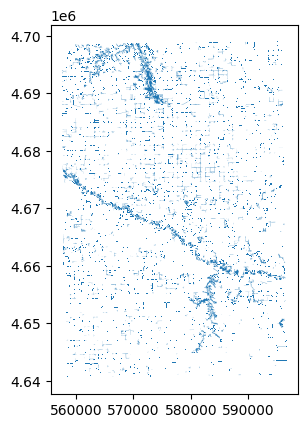

In [14]:
usdaRef.plot()

Error in callback <function _set_css_in_cell_output at 0x00000204652A21F0> (for pre_run_cell), with arguments args (<ExecutionInfo object at 20453c2ae80, raw_cell="trees = usdaRef[usdaRef.LCC != 0]
treesProj = tree.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/c%3A/Users/carverd/Documents/GitHub/Agroforestry/primaryWorkflow.ipynb#X10sZmlsZQ%3D%3D>,),kwargs {}:


TypeError: _set_css_in_cell_output() takes 0 positional arguments but 1 was given

<Axes: >

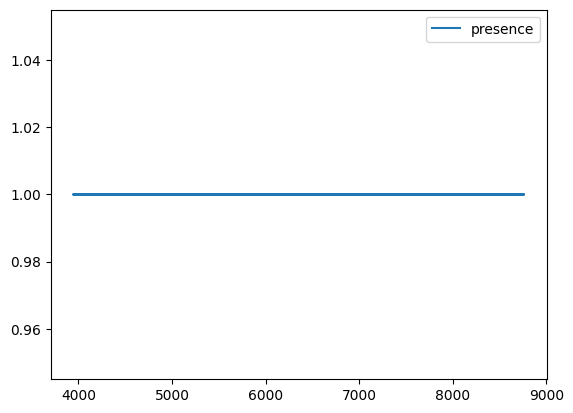

In [33]:
trees = usdaRef[usdaRef.LCC != 0]
treesProj = trees.to_crs(gridSelect.crs)
treesClipped = treesProj.clip(gridSelect)
treesClipped["presence"] = 1
# treesClipped
treesProcessed = treesClipped[["presence"]] # this indexing does retain the data as a geodate frame rather then a series
treesProcessed.plot()

In [ ]:
    # select all tree related elements 
    trees = usdaRef[usdaRef.LCC != 0] # [usdaRef.LCC in [1,2,3,4,5,6]]
    # reproject the data
    treesProj = trees.to_crs(aoiGrid.crs)
    #clip the feature to aoi
    treesClipped = treesProj.clip(aoiGrid)
    # add reference value and drop the rest 
    treesClipped["presence"] = 1
    # select new column 
    treesProcessed = treesClipped["presence"]